In [5]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Adiciona a pasta raiz ao caminho para importar nossos scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from scripts.db_connect import get_database

# Configuração do logger
logger_vox = logging.getLogger("🎲 Vox-Data-Platform")
logger_vox.setLevel(logging.WARNING)
logging.getLogger("httpx").setLevel(logging.WARNING)

# Configuração visual
sns.set_theme(style="whitegrid")
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [6]:
client = get_database()

response = client.table("knowledge_base") \
            .select("kb_id","topico", "descricao", "created_at") \
            .neq("kb_id", "vox-kb-0000") \
            .order("kb_id", desc=False) \
            .execute()
df_kb = pd.DataFrame(response.data)

# Conversão de data para padrão  e fuso brasileiro
df_kb['data_exibicao'] = pd.to_datetime(df_kb['created_at']).dt.tz_convert('America/Sao_Paulo').dt.strftime('%d/%m/%Y %H:%M:%S')

if not df_kb.empty:
    print(f"✅ {len(df_kb)} documentos localizados com sucesso")
    display(
        df_kb[['kb_id','topico', 'descricao', 'data_exibicao']]
        .set_index('kb_id')
        .head()
        )
    
else:
    print("Sem dados para exibir. Insira algo e tente novamente :/ ")

✅ 44 documentos localizados com sucesso


,topico,descricao,data_exibicao
kb_id,,,
vox-kb-0001,Escola e Universidade,Diretrizes como o Programa Escola Sem Homofobi...,17/12/2025 21:43:02
vox-kb-0002,Saúde Mental,A ausência de profissionais capacitados em clí...,17/12/2025 21:43:04
vox-kb-0003,Cultura e Representatividade,Romances como “Um Útero É Do Tamanho de Um Pun...,17/12/2025 21:43:05
vox-kb-0004,Ativismo Digital,Comunidades no Instagram e grupos no TikTok of...,17/12/2025 21:43:07
vox-kb-0005,Violência e Segurança,Estudos mostram que 45% das mulheres lésbicas ...,17/12/2025 21:43:09


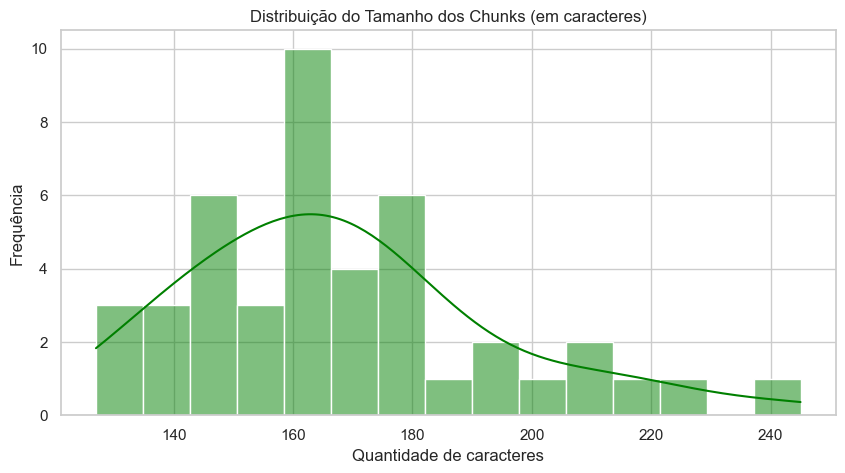

In [7]:
if not df_kb.empty:
    df_kb['tamanho_texto'] = df_kb['descricao'].apply(len)
    
    plt.figure(figsize=(10,5))
    sns.histplot(df_kb['tamanho_texto'], bins=15, kde=True, color='green')
    plt.title('Distribuição do Tamanho dos Chunks (em caracteres)')
    plt.xlabel('Quantidade de caracteres')
    plt.ylabel('Frequência')
    plt.show()